In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os

sys.path.append(os.path.abspath("../../"))
from utils import plot_functions as pf

In [3]:

data = pd.read_csv('../../data/PM4Silt/CDSSPm4silt2.csv')
params = pd.read_csv('../../data/PM4Silt/DSSPm4silt_params2.csv')


data['N'] = np.linspace(0,4,len(data['p']))

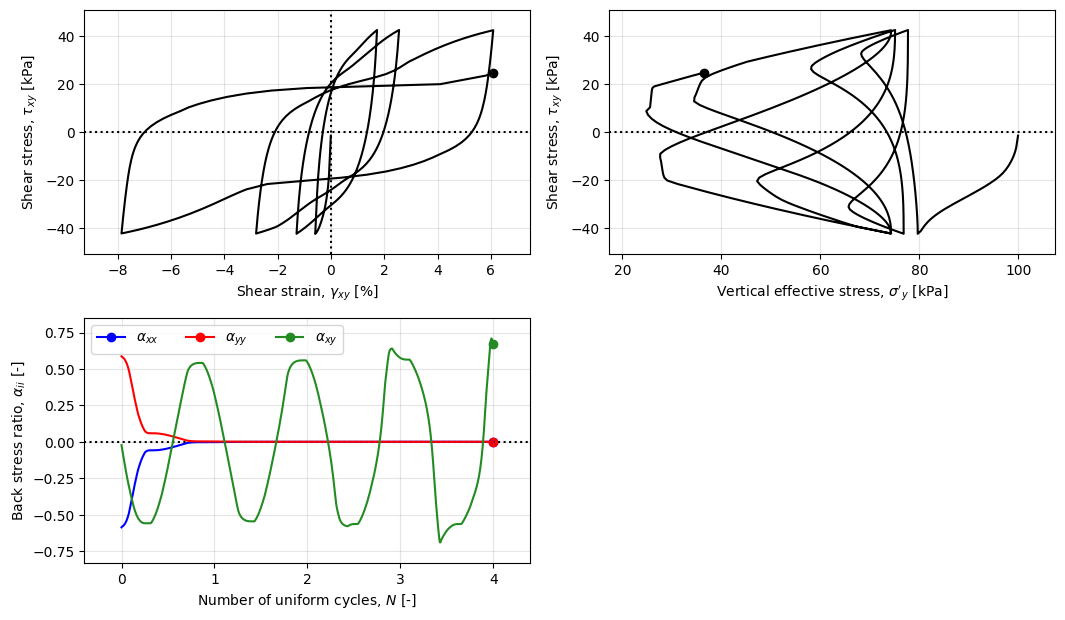

In [5]:
nx = 4
ny = 3

plt.figure(figsize=(4*nx,4*ny))

ax1 = plt.subplot2grid((nx,ny),(0,0))
pf.plot_sxy_vs_gxy(ax1,data,600)

ax1 = plt.subplot2grid((nx,ny),(0,1))
pf.plot_sxy_vs_sy(ax1,data,600)

ax1 = plt.subplot2grid((nx,ny),(1,0))
pf.plot_alpha_vs_N(ax1,data,600)

plt.tight_layout()